# Dependencies

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import os
import glob
from matplotlib.pylab import rcParams

# Help Functions

In [3]:
def imshow(image, cmap=None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
def motion_blur(image):
    # blurr size
    kernel_size = 110

    # Create the vertical kernel. 
    kernel_v = np.zeros((kernel_size, kernel_size)) 

    # Create a copy of the same for creating the horizontal kernel. 
    kernel_h = np.copy(kernel_v) 

    # Fill the middle row with ones. 
    kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
    kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size) 

    # Normalize. 
    kernel_v /= kernel_size 
    kernel_h /= kernel_size 

    # Apply the vertical kernel. 
    ver = cv2.filter2D(image, -1, kernel_v)

    # Apply the horizontal kernel. 
    hor = cv2.filter2D(image, -1, kernel_h) 

    # Apply both
    both = cv2.filter2D(ver, -1, kernel_h)


    return ver, hor, both

In [5]:
def find_best_contour(both):
    
    # threshold
    ret,thresh = cv2.threshold(both.copy(), 2, 255, cv2.THRESH_BINARY)

    # find the contours of the thresholded image
    (cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    srt_cnts = sorted(cnts, key = cv2.contourArea, reverse = True) # reverse -- true for decending
    
    if cv2.contourArea(srt_cnts[0]) <= 100000:
        [x,y,w,h] = cv2.boundingRect(srt_cnts[0])
        
        # draw rectangle around contour on original image
        best_contour = cv2.rectangle(image.copy(),(x,y),(x+w+20,y+h+50), (255,0,255), 2)
        
    else:
        # threshold
        ret,thresh = cv2.threshold(both.copy(), 3, 255, cv2.THRESH_BINARY)

        # find the contours of the thresholded image
        (cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        srt_cnts = sorted(cnts, key = cv2.contourArea, reverse = True) # reverse -- true for decending
        
        [x,y,w,h] = cv2.boundingRect(srt_cnts[0])
        # draw rectangle around contour on original image
        best_contour = cv2.rectangle(image.copy(),(x,y),(x+w+20,y+h+50),(255,0,255),2)
    #print(f'the area of the contour is {cv2.contourArea(srt_cnts[0])}')
    
    return thresh, best_contour, x,y,w,h

In [6]:
def crop(image,x,y,w,h):
    cropped = image[y:y+h+50,x:x+w+20]
    return cropped

# Step-by-Step Process

## 1) Load Data

height: 600, width: 800


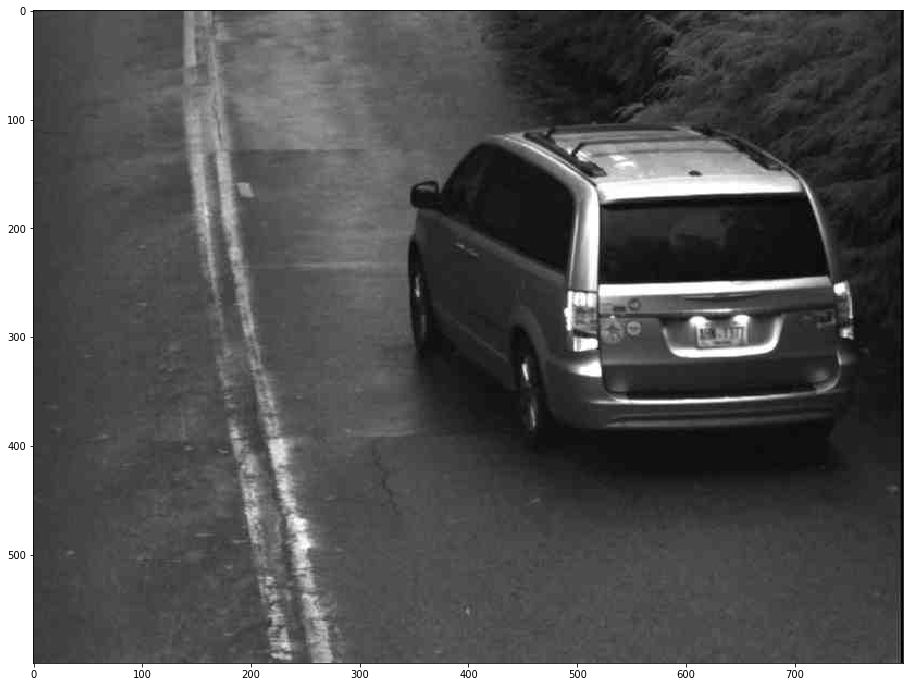

In [7]:
image_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Data\\context\\'
from os import listdir
from os.path import isfile, join
data_list = [f for f in listdir(image_path) if isfile(join(image_path, f))]
data_list = sorted(data_list, key=lambda x: float(x.split('.')[0]))


# load the image
number = 1111
image = cv2.imread(image_path + data_list[number]) # read as grayscale
img_height, img_width = image.shape[:2]
print(f'height: {img_height}, width: {img_width}')


rcParams['figure.figsize'] = 25, 12

imshow(image)

## 2) Preprocess Before Contouring

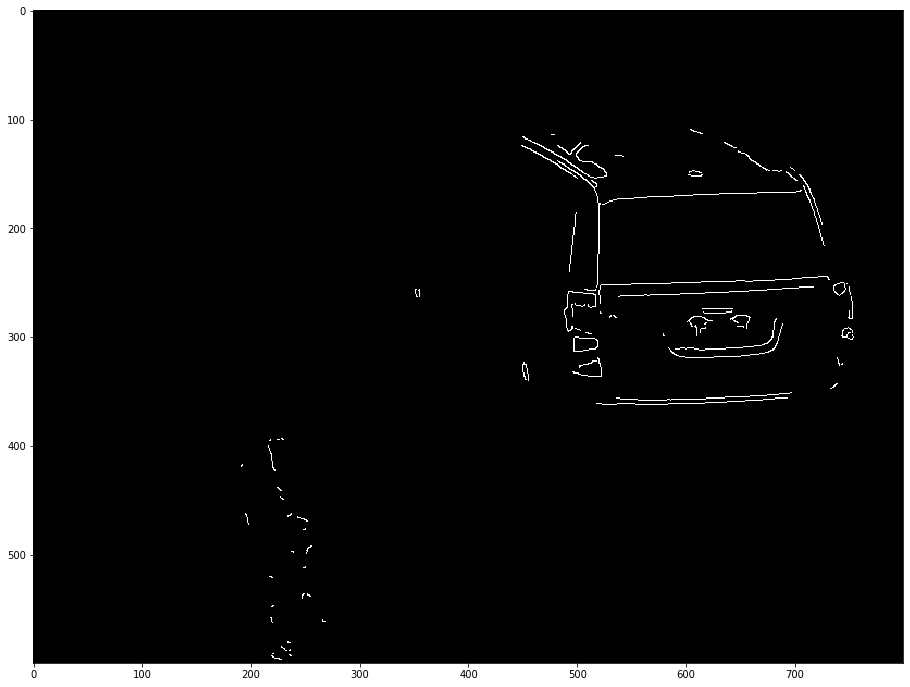

In [8]:
# load the image, convert it to grayscale, and apply gaussianblur on it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
canny_edges = cv2.Canny(blurred, 225, 250)
imshow(canny_edges)

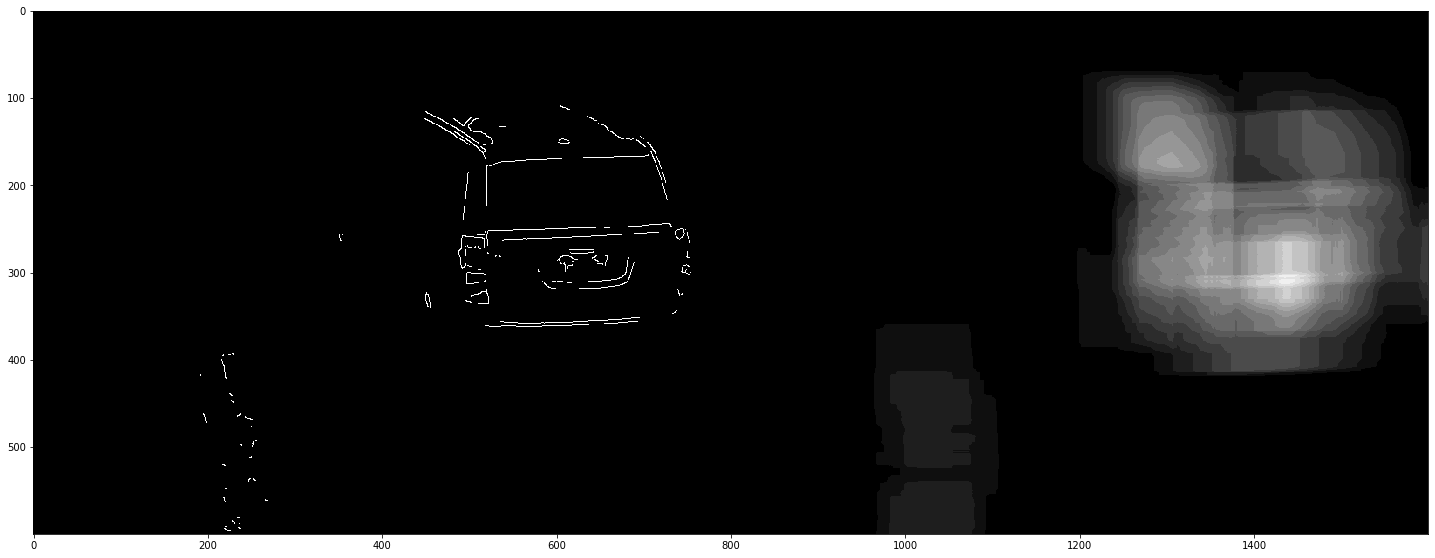

In [9]:
hor, ver, both = motion_blur(canny_edges)
intensity = 15

horizontal = np.hstack([canny_edges, hor*intensity])
vertical = np.hstack([canny_edges, ver*intensity])
output = np.hstack([canny_edges, both*intensity])


plt.imshow(output,'gray')

## 3) Finding the Best Contour

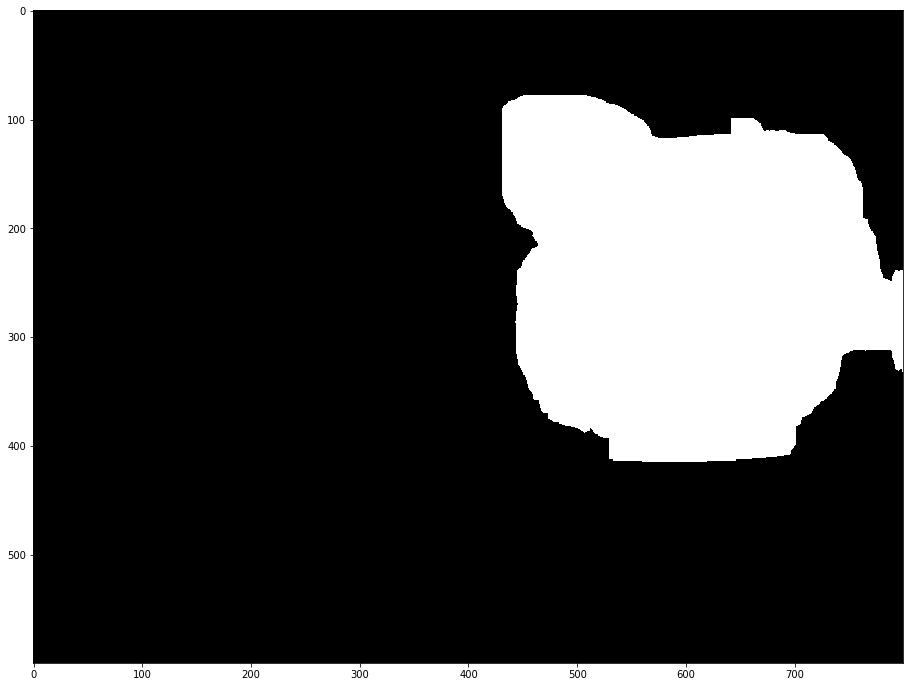

In [10]:
thresh, best_contour,x,y,w,h = find_best_contour(both)

imshow(thresh)

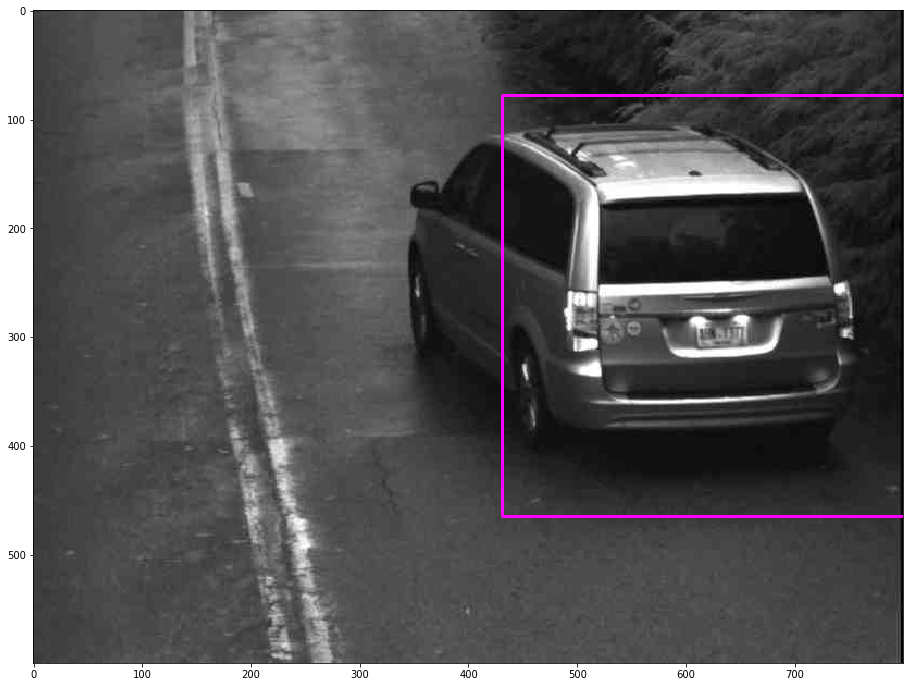

In [11]:
imshow(best_contour)

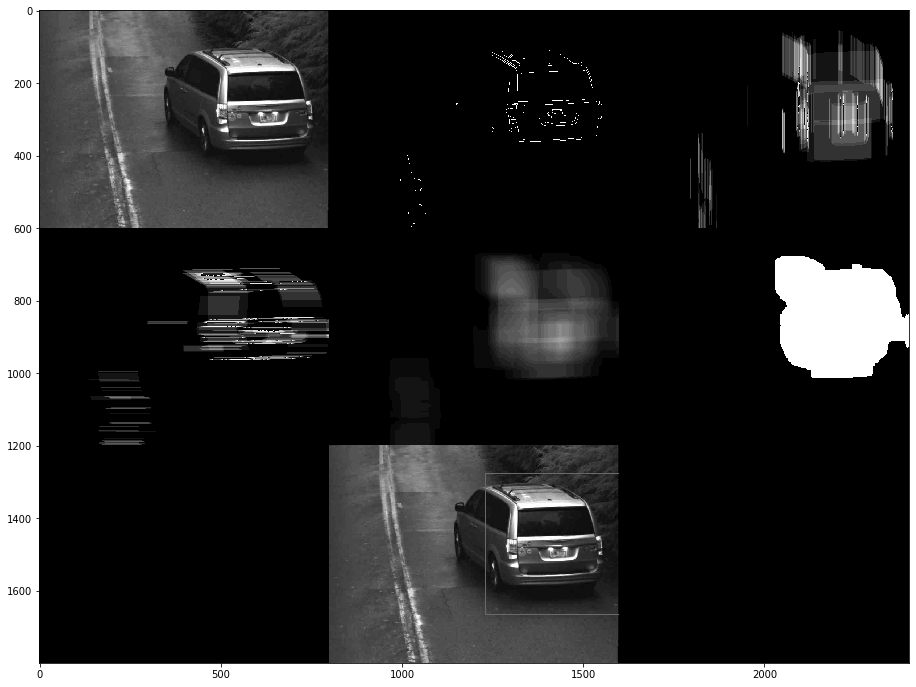

In [12]:
empty = np.zeros([img_height, img_width])
grayed_best_contour = cv2.cvtColor(best_contour, cv2.COLOR_BGR2GRAY)

images1 = np.hstack([gray, canny_edges, hor*10])
images2 = np.hstack([ver*10, both*10, thresh])
images3 = np.hstack([empty, grayed_best_contour, empty])
images = np.vstack([images1, images2, images3])
plt.imshow(images, 'gray')

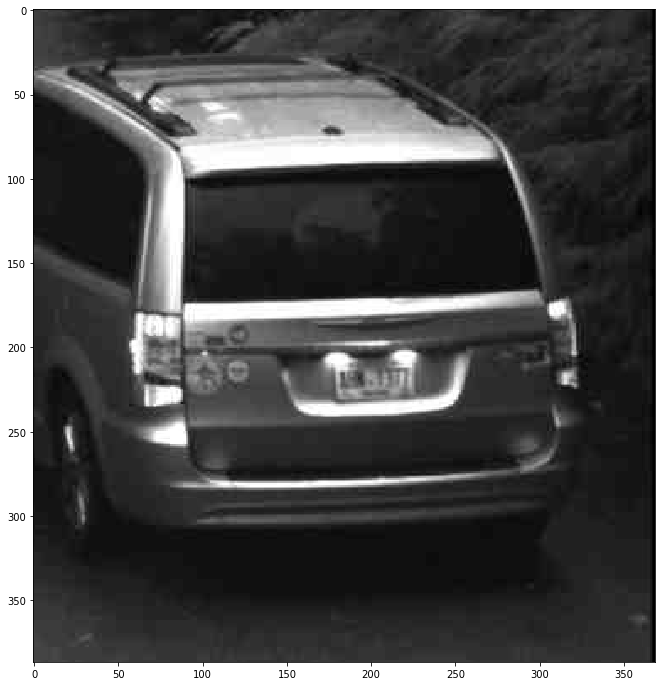

In [13]:
cropped = crop(image, x,y,w,h)
imshow(cropped)

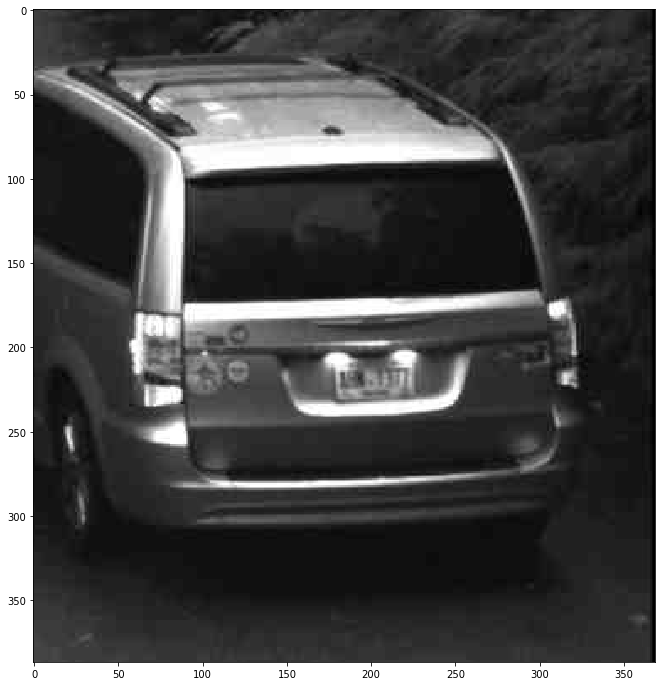

In [14]:
grayed_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
imshow(grayed_cropped)

# Overall Process

In [16]:
#number = 768
number = number

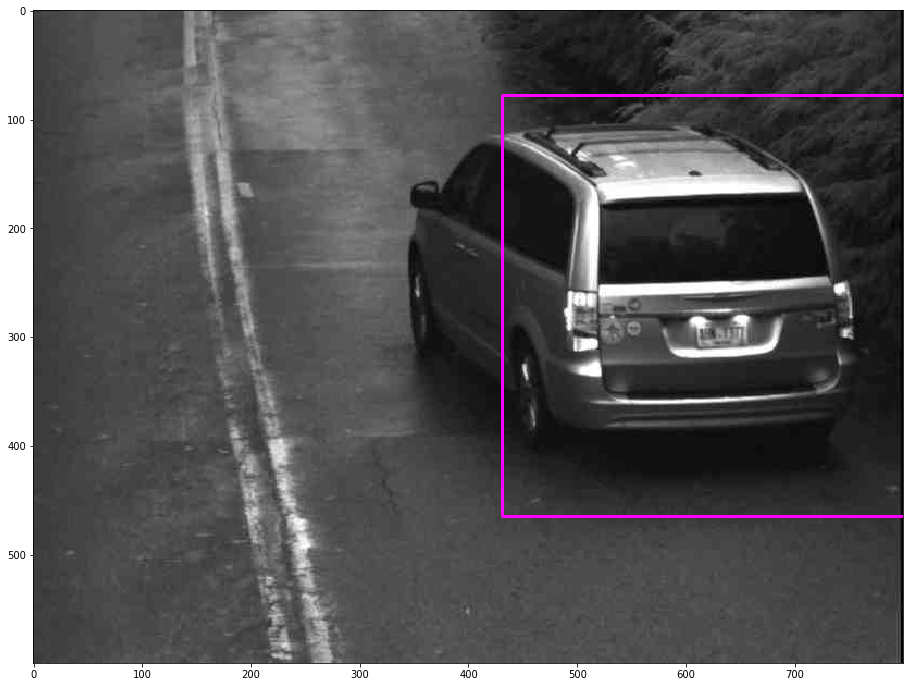

In [20]:
image = cv2.imread(image_path + data_list[number]) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny_edges = cv2.Canny(blurred, 225, 250)
hor, ver, both = motion_blur(canny_edges)
thresh, best_contour,x,y,w,h = find_best_contour(both)
cropped = crop(image, x,y,w,h)


imshow(best_contour)

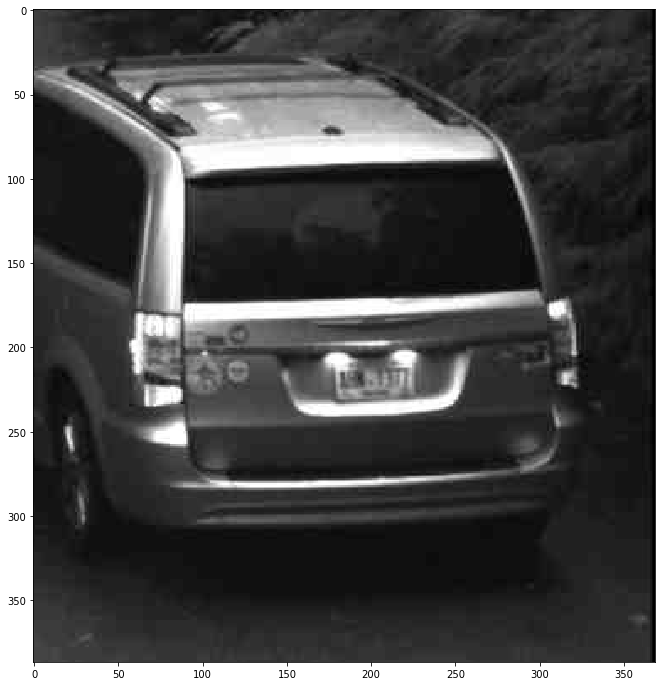

In [19]:
imshow(cropped)

# Run on a batch

In [41]:
# set the saving directory to specified path 

result_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Results\\'

segment_path = result_path + 'Segments\\'

In [47]:
image_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Data\\context\\'
data_list = [f for f in listdir(image_path) if isfile(join(image_path, f))]
data_list = sorted(data_list, key=lambda x: float(x.split('.')[0]))

count = 0
for i in data_list:
    #x = np.zeros([img_height,img_width])+255
    #cv2.imwrite(f'{segment_path}{count}.png', x)
    try:
        image = cv2.imread(image_path + i) 
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        canny_edges = cv2.Canny(blurred, 225, 250)
        hor, ver, both = motion_blur(canny_edges)
        thresh, best_contour, x,y,w,h = find_best_contour(both)
        cropped = crop(image, x,y,w,h)

        cv2.imwrite(f'{segment_path}{count}.png', cropped)
    except:
        print(count)
    count += 1
    

768
